In [240]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.ndimage.interpolation import rotate


/tmp/ipykernel_10510/2280136196.py:4: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate


In [241]:
def contrast_stretch(image, min_val=0, max_val=255):
    image_min = np.min(image)
    image_max = np.max(image)
    new_image = (image - image_min) * ((max_val - min_val) / (image_max - image_min)) + min_val
    return new_image


In [242]:
def convert_circular(img):
    M, N = img.shape
    
    radial = np.zeros((M, N))
    center_x, center_y = (N - 1) / 2, (M - 1) / 2
    radius = 0.5 * min(M, N)

    y, x = np.ogrid[:M, :N]
    distance = np.sqrt((y - center_y)**2 + (x - center_x)**2)
    radial = np.where(distance < radius, 1, 0)

    img_f = img * radial
    return img_f


In [244]:
def sinogram(image, theta1=0, theta2=360, step=18, num_detectors=150):
    num_thetas = int((theta2-theta1)/step)
    M, N = image.shape
    # sino = np.zeros((num_thetas, max(M, N)))
    sino = np.zeros((num_thetas, num_detectors))
    
    thetas = np.linspace(theta2, theta1, num_thetas)
    col_indices = (np.linspace(0,N,num_detectors)).astype(np.int_)
    col_indices[-1]=col_indices[-1]-1
    
    for i, theta in enumerate(thetas):
        rotated_image = rotate(image, theta, reshape=False)
        sino[i] = np.sum(rotated_image[:,col_indices], axis=0)

    sino = sino.T
    return sino
    

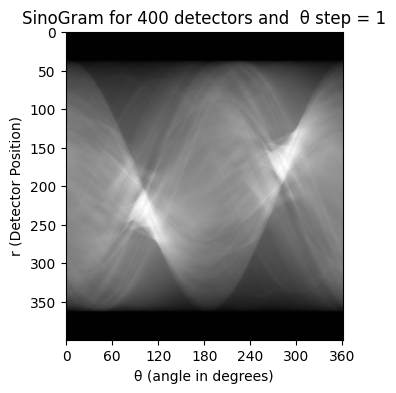

In [239]:
image = cv2.imread('./fish.bmp',cv2.IMREAD_GRAYSCALE)
img = convert_circular(image)

num_detectors = 400
theta_step = 1

S = sinogram(image=img, step=theta_step, num_detectors=num_detectors)
S = contrast_stretch(S)
plt.figure(figsize=(12, 4))
plt.imshow(S, cmap='gray')
plt.xlabel('θ (angle in degrees)')
plt.ylabel('r (Detector Position)')
plt.xticks(np.linspace(0, S.shape[1] - 1, 7), labels=np.linspace(0, 360, 7).astype(int))
plt.title('SinoGram for '+str(num_detectors)+' detectors and '+' θ step = '+str(theta_step))
plt.show()
